# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to read data from Yahoo Finance to pandas dataframe!

### The Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
%matplotlib inline

## Data

We need to get data using yfinance library. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
3. Figure out how to use yfinance to grab info on the stock.

In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [3]:
BAC = yf.download("BAC", start, end)  # Bank of America
C = yf.download("C", start, end)  # CitiGroup
GS = yf.download("GS", start, end)  # Goldman Sachs
JPM = yf.download("JPM", start, end)  # JPMorgan Chase
MS = yf.download("MS", start, end)  # Morgan Stanley
WFC = yf.download("WFC", start, end)  # Wells Fargo

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

** Set the column name levels (this is filled out for you):**

In [6]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

** Check the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.750566  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.413372  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.453861  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.406618  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.426849  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  32.661316  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  32.683704  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  32.773342  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  32.806942  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.154236  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  18.979549  11016400  
2006-01-04   31.530001  18.759413  10870000  
2006-01-05   31.495001  18.738586  10158000  
2006-01-06   31.680000  18.848656   8403800  
2006-01-09   31.674999  18.845688   5619600  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs("Close", axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [10]:
for ticker in tickers:
    returns[ticker] = bank_stocks[ticker]["Close"].pct_change()

returns.head()

,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

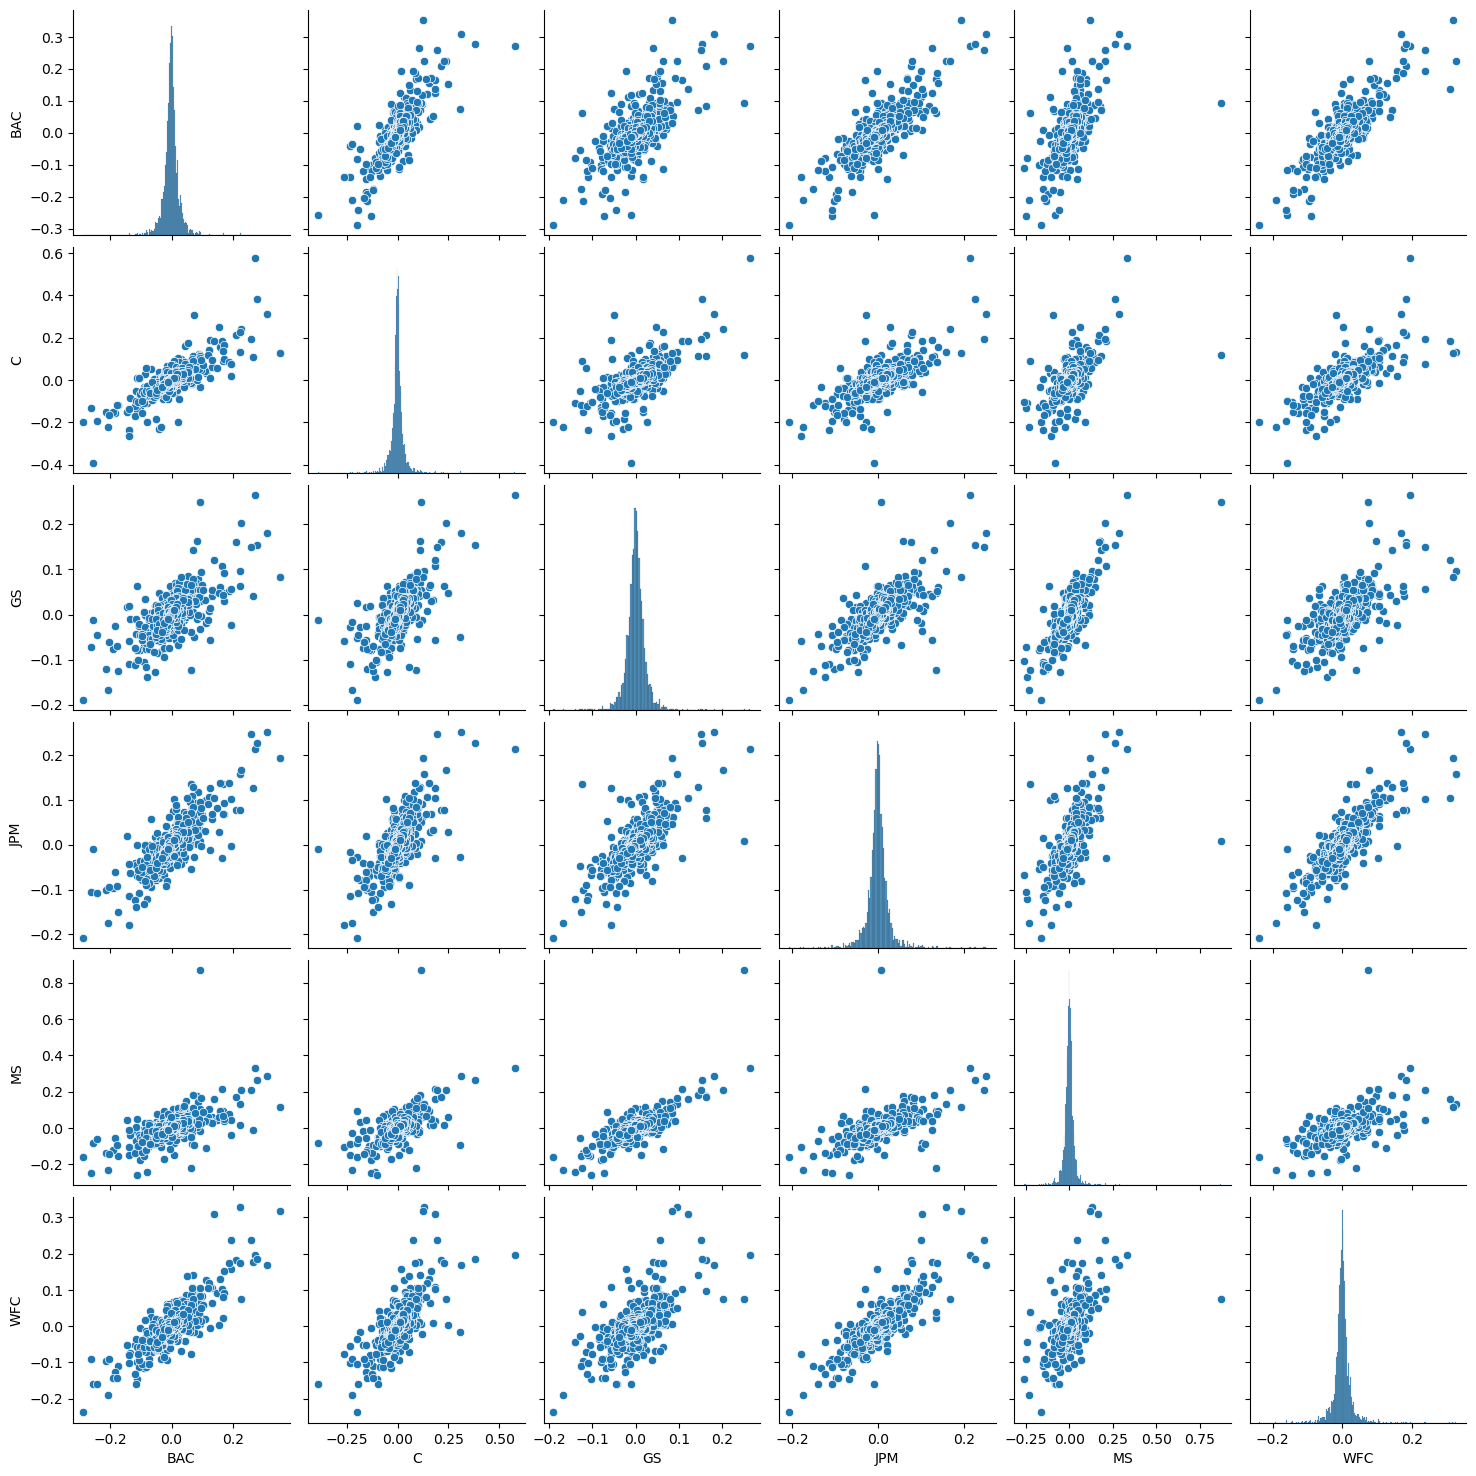

In [11]:
import seaborn as sns

sns.pairplot(returns)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [12]:
# Best single day returns
returns.idxmin()  # 2009-01-20 was the day of the worst drop for 4 of the banks

BAC   2009-01-20
C     2009-02-27
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [13]:
# Worst single day returns
returns.idxmax()  

BAC   2009-04-09
C     2008-11-24
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [14]:
returns.std()  # Citigroup stock is riskiest over the entire time period

BAC    0.036647
C      0.038672
GS     0.025390
JPM    0.027667
MS     0.037819
WFC    0.030238
dtype: float64

In [15]:
returns.loc['2015-01-01':'2015-12-31'].std()  # Morgan Stanley is the riskiest for the year 2015

BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

Text(0.5, 1.0, '2015 returns for Morgan Stanley')

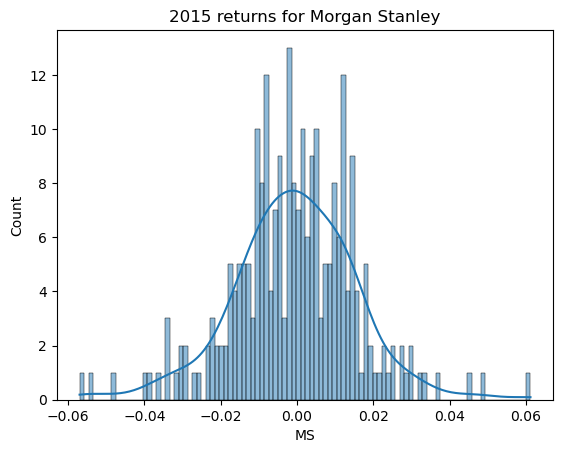

In [16]:
sns.histplot(x=returns.loc['2015-01-01':'2015-12-31']['MS'], bins=100, kde=True).set_title("2015 returns for Morgan Stanley")

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

Text(0.5, 1.0, '2008 returns for CitiGroup')

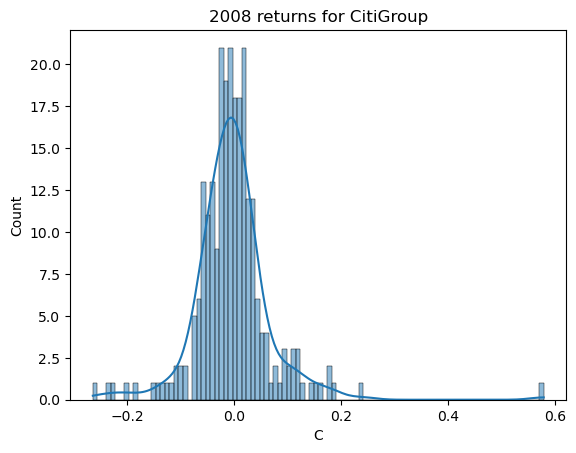

In [17]:
sns.histplot(x=returns.loc['2008-01-01':'2008-12-31']['C'], bins=100, kde=True).set_title("2008 returns for CitiGroup")

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

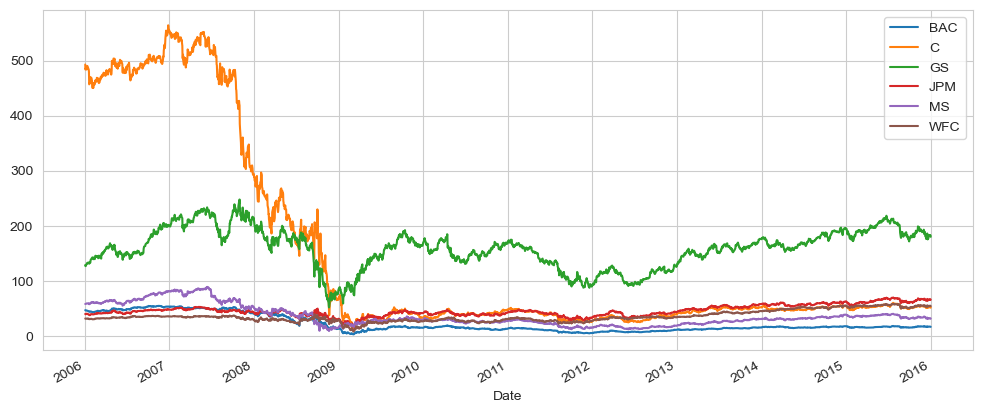

In [19]:
# Close price for each bank using a for loop
for ticker in tickers:
    bank_stocks[ticker]["Close"].plot(figsize=(12, 5), label=ticker)
plt.legend()

<Axes: xlabel='Date'>

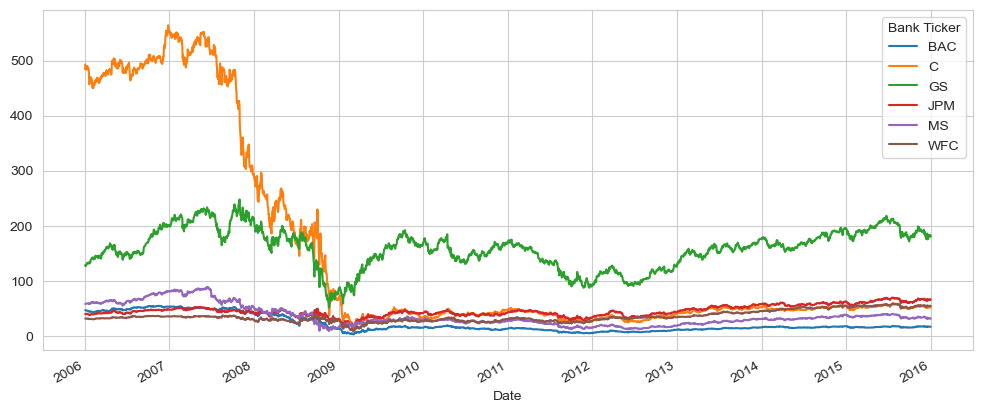

In [20]:
# Close price for each bank using .xs to get a cross section of the data
bank_stocks.xs("Close", axis=1, level='Stock Info').plot(figsize=(12, 5))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

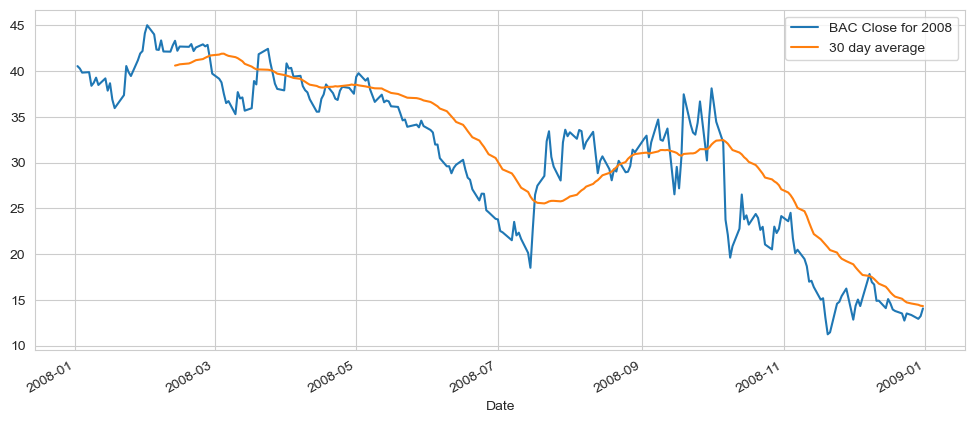

In [21]:
figsize = (12, 5)
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(figsize=figsize, label="BAC Close for 2008")
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(figsize=figsize, label="30 day average")
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

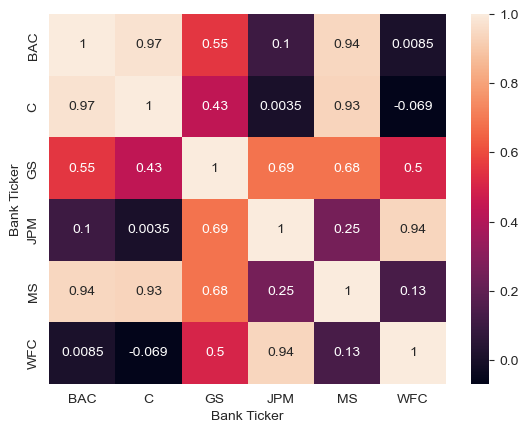

In [22]:
sns.heatmap(bank_stocks.xs("Close", axis=1, level='Stock Info').corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

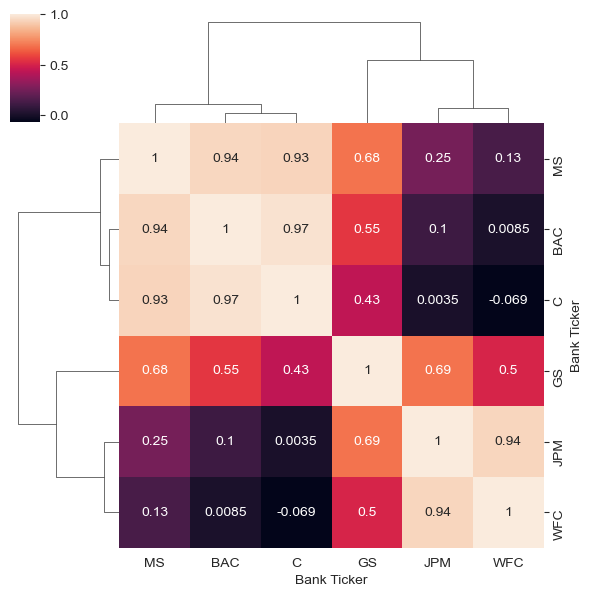

In [23]:
sns.clustermap(bank_stocks.xs("Close", axis=1, level='Stock Info').corr(), annot=True, figsize=(6, 6))

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization operations.